<a href="https://colab.research.google.com/github/esmacicek/esmacicek/blob/main/googlenet_deneme2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [2]:
# Veri yolu
train_path = '/content/drive/MyDrive/alz.dmn.project/Split/Train'
valid_path = '/content/drive/MyDrive/alz.dmn.project/Split/Validation'
test_path = '/content/drive/MyDrive/alz.dmn.project/Split/Test'


In [3]:
# Veri artırımı konfigürasyonu
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

In [4]:
# Veri setini yükleyin ve artırın
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 6796 images belonging to 4 classes.
Found 2266 images belonging to 4 classes.


In [6]:
# InceptionV3 modelini kullanın
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Yeni bir model oluşturun ve InceptionV3 modelini ekleyin
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Modeli derleyin
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Modeli eğitin
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Modeli değerlendirin
test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
# Modeli kaydedin
model.save('/content/drive/MyDrive/alz.dmn.project/Model/inception2.model.son.h5')

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/40
106/106 [==============================] - 1921s 18s/step - loss: 1.0285 - accuracy: 0.5478 - val_loss: 1.2757 - val_accuracy: 0.4938
Epoch 2/40
106/106 [==============================] - 121s 1s/step - loss: 0.6686 - accuracy: 0.6895 - val_loss: 0.6299 - val_accuracy: 0.7045
Epoch 3/40
106/106 [==============================] - 121s 1s/step - loss: 0.5795 - accuracy: 0.7296 - val_loss: 0.6453 - val_accuracy: 0.7045
Epoch 4/40
106/106 [==============================] - 122s 1s/step - loss: 0.5236 - accuracy: 0.7451 - val_loss: 0.5889 - val_accuracy: 0.7312
Epoch 5/40
106/106 [==============================] - 119s 1s/step - loss: 0.5027 - accuracy: 0.7659 - val_loss: 1.5788 - val_accuracy: 0.4799
Epoch 6/40
106/106 [==============================] - 121s 1s/step - loss: 0.4647 - accuracy: 0.7888 - val_loss: 0.6909 - val_accuracy: 0.7504
Epoch 7/40
106/106 [==============================] - 122s 1s/step - loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
accuracy = model.evaluate(test_generator)
print('Test Accuracy:', accuracy[1])

65/65 [==============================] - 439s 7s/step - loss: 0.2667 - accuracy: 0.9270
Test Accuracy: 0.926982581615448


In [9]:
# Eğitim sırasında elde edilen metrikleri alın
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

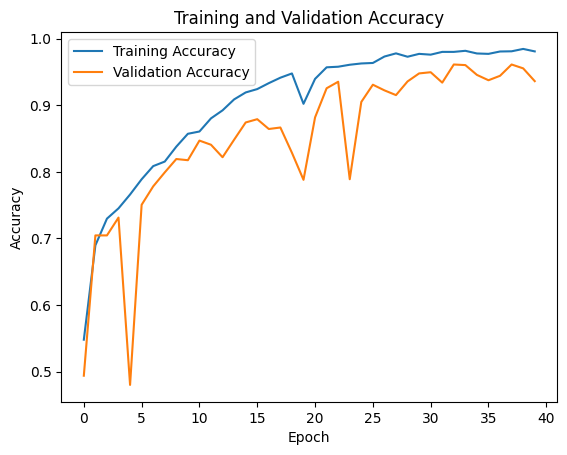

In [10]:
# Doğruluk Grafiği
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

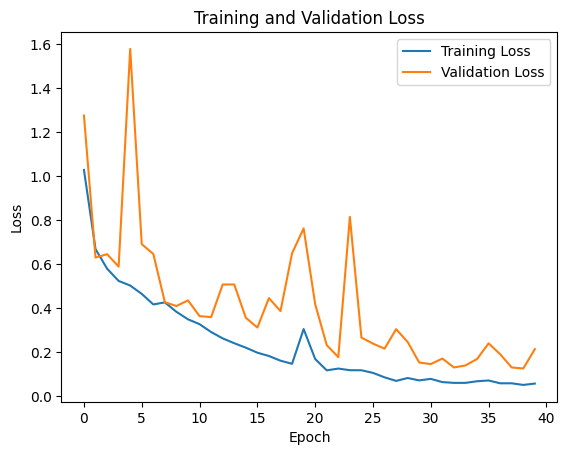

In [11]:
# Kayıp Grafiği
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


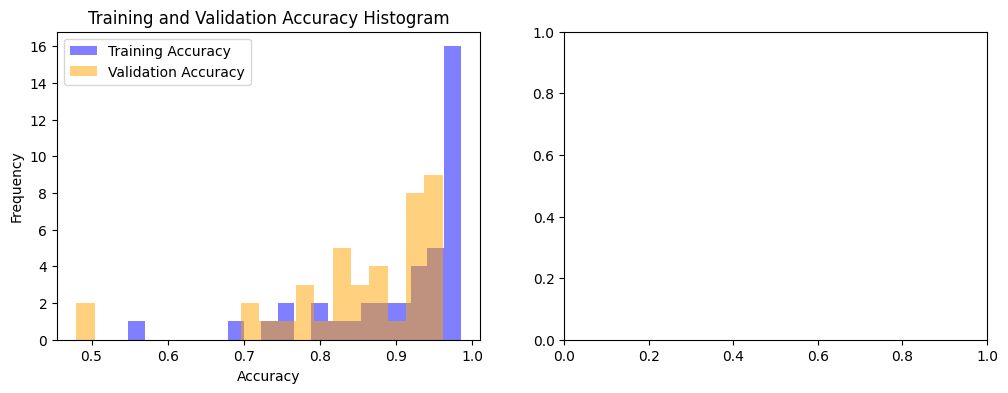

In [14]:
# Histogram Grafiği
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Doğruluk Histogramı
ax1.hist(train_accuracy, bins=20, alpha=0.5, color='blue', label='Training Accuracy')
ax1.hist(val_accuracy, bins=20, alpha=0.5, color='orange', label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy Histogram')
ax1.set_xlabel('Accuracy')
ax1.set_ylabel('Frequency')
ax1.legend()